<a href="https://colab.research.google.com/github/TheDangerD0802/Twitter_Sentiment_Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 1` Dataset Overview


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.1** Connect to Google Drive


* Initiate the connection with Google Drive

In [4]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

* Specify the Google Drive file ID

In [5]:
# Download a file based on its file ID.

# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1x5f3ZkF0EuQMTwG_VXfK0jM1EINJ0DZt' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('tweet_data.csv')  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.2** Load and analyze Dataset

Very useful packages for Data Analysis. Don't hesitate to visit any of those sites in case you don't get what we are doing.
*   `Pandas`: https://pandas.pydata.org/docs/
*   `Numpy`: https://numpy.org/doc/





In [2]:
import pandas as pd
import numpy as np

* Read Dataframe stored in Google Drive under `.csv` format

In [3]:
df = pd.read_csv("tweet_data.csv")

* Use the `sample` method to look at some random tweets present in our dataset

In [4]:
df.sample(10)

,textID,tweet_text,sentiment
9424,1966404364,at hannah montana set.... im missing tennessee...,negative
1163,1957546773,Cars been dropped off for service and mot get...,negative
2680,1960954086,Irony: Inventor of Ford Mustang can't keep his...,negative
11698,1694975919,New word of the day: &quot;Whoore lure&quot; y...,positive
4711,1962743903,@starstruckfeie i have no one to watch it wit...,negative
11359,1694791299,@MicheleKnight Thats beautiful,positive
8336,1965730305,I hate the dryer.,negative
1117,1957523762,I have been playing skate for two hours. Now i...,negative
465,1957187070,@Desert_Star95 oh so you know how I feel then ...,negative
5587,1963369998,"pop, idk how to reply to ur tweet from my phon...",positive


* Check how many tweets there are in total

In [5]:
print("Number of tweets: {}".format(len(df)))

Number of tweets: 18727


* Print a tweet and its sentiment based on a tweet ID

In [6]:
tweet_id = 4879
tweet = df.iloc[tweet_id]

In [7]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: Bad Day. History Test Tommorrow. And I want to go out in the sun and play..
Tweet sentiment: negative


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.3** Dataset Visualization

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.3.1** Matplotlib</h4>

* Import the `pyplot` module from the matplotlib package 

In [8]:
import matplotlib.pyplot as plt

* `pyplot` helps understanding and representing how tweets are distributed over the dataset

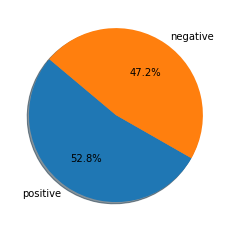

In [9]:
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

* Print the count of positive and negative tweets

In [10]:
print("Number of + tweets: {}".format(df[df["sentiment"]=="positive"].count()[0]))
print("Number of - tweets: {}".format(df[df["sentiment"]=="negative"].count()[0]))

Number of + tweets: 9897
Number of - tweets: 8830


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.3.2** Wordclouds

* The `Wordclouds` package is very useful to get a quick overview of most recurrent words in the text corpus

In [11]:
from wordcloud import WordCloud

* What are the words most often present in positive tweets?

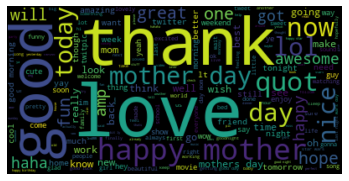

In [12]:
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

* ... and in negative tweets?

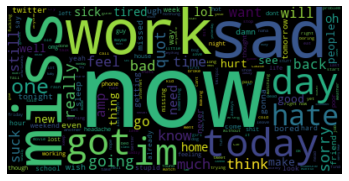

In [13]:
neg_tweets = df[df["sentiment"]=="negative"]
txt = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `SECTION 2` Text Normalization

As this section relies quite a lot on `REGEX`, you might want to have a look at the following website: https://regexr.com/

* Import `regex` package

In [14]:
import re

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.1** Twitter features

* Example of a *random* tweet that can be found on Twitter

In [15]:
tweet = "RT @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.1** RT Tag

#### Need a hint?

* `R` : match "R" character
* `T` : match "T" character
* `\s` : match any whitespace character
* `+` : match one or more of the preceding tokens

#### Handle the RT Tag

* Replace occurences of `RT` with a default value

In [16]:
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

In [17]:
print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet: @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.2** @User Tag

#### Need a hint?




* `\B` : match any position that is not a word boundary
* `@` : match "@" character
* `\w` : match any word character 
* `+` : match one or more of the preceding tokens

#### Handle the User Tag

* Replace `@_Someone_` with a default user tag

In [18]:
def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [19]:
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: RT twitteruser I love this! 👍 https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.3** Emojis

* Install the `emoji` package

In [20]:
pip install emoji --upgrade

     |████████████████████████████████| 184 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=e0ba90bf790905cfc2d111978d06f8a5d7236a5678568fc4c227581aaea5e13d
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built emoji


* Import the installed package

In [21]:
import emoji

* Replace emojis with a meaningful text

In [22]:
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [23]:
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: RT @AIOutsider I love this! :thumbs_up: https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.4** URL

#### Need a hint?

* `(http|https)` : capturing group matching either http or https
* `:` : match the ":" character
* `\/` : match the "/" charachter
* `\S` : match any character that is not whitespace
* `+` : match one or more of the preceding tokens

#### Handle the URL

* Replace occurences of `http://` or `https://` with a default value

In [24]:
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

In [25]:
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍  #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.5** Hashtags

* Replace occurences of `#_something_` with a default value

In [26]:
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

In [27]:
print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍 https://AIOutsider.com NLP Fun


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.2** Word Features

Let's now have a look at some other features that are not really Twitter-dependant

In [28]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.1** Remove upper capitalization

* Lower case each letter in a specific tweet

In [29]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [30]:
print("Processed tweet: {}".format(to_lowercase(tweet)))

Processed tweet: looooooook at this ... i'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.2** Word repetition

* Replace word repetition with a single occurence ("oooooo" becomes "oo")

In [31]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [32]:
print("Processed tweet: {}".format(word_repetition(tweet)))

Processed tweet: LOOK at this .. I'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.3** Punctuation repetition

* Replace punctuation repetition with a single occurence ("!!!!!" becomes "!")

In [33]:
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

In [34]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: LOOOOOOOOK at this . I'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.4** Word contraction

* Install the `contractions` package

In [35]:
pip install contractions

     |████████████████████████████████| 321 kB 5.6 MB/s 
     |████████████████████████████████| 283 kB 41.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85451 sha256=bb403b9947318a5a7bd02ab8d642a1052b7a92343df6694018f352e7ede863c3
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


* Import the installed package

In [36]:
import contractions

* Use `contractions_dict` to list most common contractions

In [37]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions dictionnary

In [38]:
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet

In [39]:
print("Processed tweet: {}".format(_fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions package

In [40]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [41]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.3** Tokenization

More information about NLTK? Head over to: https://www.nltk.org

* Install the `NLTK` package

In [42]:
pip install nltk

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.1** Easy Tokenization

* Import `NLTK`
* Import the `word_tokenize` module from NLTK 
* Download the `Punkt` tokenizer model from NLTK

In [43]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

* Simple tweet to be tokenized

In [44]:
tweet = "These are 5 different words!"

* Create a `tokenize()` function that takes a tweet as input and returns a list of tokens

In [45]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

* Use the `tokenize()` function to print the tokenized version of a tweet

In [46]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']


That's it for the easy method! You will now see there is more you can do about it.

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.2** Custom Tokenization

* Import the `string` package 

In [47]:
import string

* Retrieve english punctuation signs by using the `string` package

In [48]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


* Import the `stopwords` module from NLTK
* Download `stopwords` data from NLTK

In [49]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

* Create a set of english stopwords

In [50]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'was', 'too', "wasn't", 'why', 'before', 'their', 'and', 'his', 'of', 'doesn', 'she', "don't", 'weren', 'd', 'there', 'then', 'm', 'above', 'have', 'each', 'my', 'are', 'couldn', 'mightn', "shouldn't", "hasn't", 'as', 'on', 'is', "aren't", 'did', 'yourself', 'himself', 'those', 'yours', 'll', "mustn't", 'we', 'by', 'because', 'same', 'am', 'ma', 'that', 'shouldn', 'your', 'they', 's', 'if', 'from', 'not', 'had', 'few', 'were', "you'll", "it's", 'wouldn', 'our', 'other', 'through', 'hers', 'below', 'y', "couldn't", "doesn't", 'into', "you're", 'whom', 'how', 'more', 've', "that'll", 'both', 'these', 'until', 't', 'when', 'an', "didn't", 'ain', 'mustn', 'been', 'just', 'once', 'isn', 'to', 'yourselves', 'should', 'again', 'will', 'theirs', 'can', 'hasn', 'o', "you've", 'only', 'themselves', 're', 'i', "isn't", 'ourselves', 'you', 'all', 'now', 'didn', 'won', 'some', 'having', 'under', "needn't", "she's", "haven't", 'doing', 'shan', 'such', 'needn', "you'd", 'who', 'be', 'don', 'myself',

* Remove some stopwords from the set

In [51]:
stop_words.discard('not')
print(stop_words)

{'was', 'too', "wasn't", 'why', 'before', 'their', 'and', 'his', 'of', 'doesn', 'she', "don't", 'weren', 'd', 'there', 'then', 'm', 'above', 'have', 'each', 'my', 'are', 'couldn', 'mightn', "shouldn't", "hasn't", 'as', 'on', 'is', "aren't", 'did', 'yourself', 'himself', 'those', 'yours', 'll', "mustn't", 'we', 'by', 'because', 'same', 'am', 'ma', 'that', 'shouldn', 'your', 'they', 's', 'if', 'from', 'had', 'few', 'were', "you'll", "it's", 'wouldn', 'our', 'other', 'through', 'hers', 'below', 'y', "couldn't", "doesn't", 'into', "you're", 'whom', 'how', 'more', 've', "that'll", 'both', 'these', 'until', 't', 'when', 'an', "didn't", 'ain', 'mustn', 'been', 'just', 'once', 'isn', 'to', 'yourselves', 'should', 'again', 'will', 'theirs', 'can', 'hasn', 'o', "you've", 'only', 'themselves', 're', 'i', "isn't", 'ourselves', 'you', 'all', 'now', 'didn', 'won', 'some', 'having', 'under', "needn't", "she's", "haven't", 'doing', 'shan', 'such', 'needn', "you'd", 'who', 'be', 'don', 'myself', 'than'

* Create a `custom_tokenize` function

In [52]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

* Test the function with a particular tweet

In [53]:
tweet = "these are 5 different words!"

In [54]:
print("Tweet tokens: {}".format(custom_tokenize(tweet, 
                                                keep_punct=True, 
                                                keep_alnum=True, 
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['these', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['these', 'are', 'different', 'words']
Tweet tokens: ['5', 'different', 'words']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.4** Stemming

More information about `NLTK.stem`? Head over to: https://www.nltk.org/api/nltk.stem.html

* Import different libraries and modules used for stemming

In [55]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

* List of tokens to stem (remember that we stem tokens and not entire sentences)

In [56]:
tokens = ["manager", "management", "managing"]

* Stemmers can be defined by directly using NLTK

In [57]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')

* Create a `stem_tokens` function that takes the list of tokens as input and returns a list of stemmed tokens

In [58]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

* Print the different results and compare the stemmed tokens

In [59]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


* Check over-stemming and under-stemming

In [60]:
tokens = ["international", "companies", "had", "interns"]

In [61]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.5** Lemmatization

More information about WordNet? Head over to https://wordnet.princeton.edu/

* Import different libraries and modules used for lemmatization

In [62]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

* List of tokens to lemmatize (remember that we lemmatize tokens and not entire sentences)

In [63]:
tokens = ["international", "companies", "had", "interns"]

* Part of Speech (POS) tagging

In [64]:
word_type = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }

* Create the lemmatizer by using the `WordNet` module

In [65]:
lemmatizer = WordNetLemmatizer()

* Create a `lemmatize_tokens` function that takes the list of tokens as input and returns a list of lemmatized tokens

In [66]:
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [67]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.6** Putting it all together

* Long and complex tweet to be processed

In [68]:
complex_tweet = r"""RT @AIOutsider : he looooook, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"""

* Create a custom `process_tweet` function that can be used to process tweets end-to-end
* **Note**: this function will be used as a base for the following sections, so be careful!

In [69]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

* Test your `process_tweet` function!

In [70]:
print(process_tweet(complex_tweet, verbose=False))

['look', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'not', 'normal', 'check', 'let', 'know', 'nlp', 'fun']


* Look at some more examples! 
* **Note:** it's totally possible you encounter some strange tweet processing (happens if the original tweet is initially strangely written) 

In [71]:
import random

In [72]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["tweet_text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Initial tweet: According to @momsrising, a quarter of families under six live in poverty.
Post Twitter processing tweet: According to , a quarter of families under six live in poverty.
Post Word processing tweet: according to , a quarter of families under six live in poverty.
['accord', 'quarter', 'famili', 'six', 'live', 'poverti']


Initial tweet: Went to a party last night. Dindin and I showed up in matching outfits ) GREAT MINDS THINK ALIKE ) Anyway, happy birthday, ate lara
Post Twitter processing tweet: Went to a party last night. Dindin and I showed up in matching outfits ) GREAT MINDS THINK ALIKE ) Anyway, happy birthday, ate lara
Post Word processing tweet: went to a party last night. dindin and i showed up in matching outfits ) great minds think alike ) anyway, happy birthday, ate lara
['went', 'parti', 'last', 'night', 'dindin', 'show', 'match', 'outfit', 'great', 'mind', 'think', 'alik', 'anyway', 'happi', 'birthday', 'ate', 'lara']


Initial tweet: @TDBeadles as to sleepin

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 3` Text Representation </h2>

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.1** Processing Tweets

* Install the `Scikit-Learn` package which is very useful for a lot of different ML tasks. 
* **Note:** make sure it is installed and up-to-date (once installed/updated, you might be asked to reload Colab). 

In [73]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3 MB 6.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


* Apply `process_tweet` function created in section 2 to the entire DataFrame
* Convert sentiment to 1 for "positive" and 0 for "negative" sentiment

In [74]:
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1
                                              if i == "positive" else 0)
df.head(10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[not, go, prom, bc, bf, not, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmm],0
5,1956969035,@charviray Charlene my love. I miss you,negative,"[charlen, love, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,"[i, sorri, least, friday]",0
7,1956969531,Choked on her retainers,negative,"[choke, retain]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,"[ugh, beat, stupid, song, get, next, rude]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,"[watch, hill, london, realis, tourtur, week, w...",0


* Convert DataFrame to two lists: one for the tweet tokens (X) and one for the tweet sentiment (y)







In [75]:
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [76]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bc', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['i', 'sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['i', 'sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['an

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.2** Positive/Negative Frequency

* Corpus of tweet tokens used for the first method

In [77]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

sentiment = [1, 0, 1, 1, 0, 0]


* Create a `build_freqs` function used to build a dictionnary with the word and sentiment as index and the count of occurence as value


<table style="width:100%">
  <tr>
    <th>Word</th>
    <th>Positive</th>
    <th>Negative</th>
  </tr>
  <tr>
    <td>love</td>
    <td>dict[(love, 1)]</td>
    <td>dict[(love, 0)]</td>
  </tr>
  <tr>
    <td>lost</td>
    <td>dict[(lost, 1)]</td>
    <td>dict[(lost, 0)]</td>
  </tr>
  <tr>
    <td>happy</td>
    <td>dict[(happy, 1)]</td>
    <td>dict[(happy, 0)]</td>
  </tr>
</table>


In [78]:
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs

* Build the frequency dictionnary on the corpus by using the function

In [79]:
freqs = build_freqs(corpus, sentiment)

In [80]:
print(freqs)

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


* Build the frequency dictionnary on the entire dataset by using the function

In [81]:
freqs_all = build_freqs(X, y)

In [82]:
print("Frequency of word 'love' in + tweets: {}".format(freqs_all[("love", 1)]))
print("Frequency of word 'love' in - tweets: {}".format(freqs_all[("love", 0)]))

Frequency of word 'love' in + tweets: 1357
Frequency of word 'love' in - tweets: 67


* Create a `tweet_to_freqs` function used to convert tweets to a 2-d array by using the frequency dictionnary

In [83]:
def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x

* Print the 2-d vector by using the `tweet_to_freqs` function and the *corpus* dictionnary

In [84]:
print(tweet_to_freq(["i", "love", "nlp"], freqs))

[5. 3.]


* Print the 2-d vector by using the `tweet_to_freqs` function and the *dataset* dictionnary

In [85]:
print(tweet_to_freq(["i", "love", "nlp"], freqs_all))

[2525. 1739.]


* Plot word vectors in a chart and see where they locate

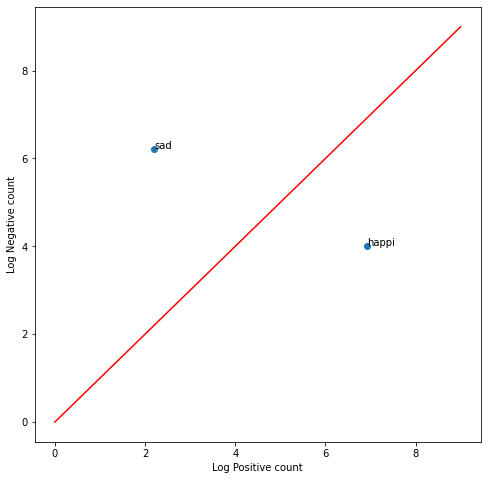

In [86]:
fig, ax = plt.subplots(figsize = (8, 8))

word1 = "happi"
word2 = "sad"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.3** Bag of Word

* Corpus of tweet tokens used for the second method

In [87]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Import `CountVectorizer` from the Scikit-learn Library

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

* Create a `fit_cv` function used to build the Bag-of-Words vectorizer with the corpus

In [89]:
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

* Use the `fit_cv` function to fit the vectorizer on the corpus

In [90]:
cv_vect = fit_cv(corpus)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  " since 'analyzer' != 'word'")


* Get the vectorizer features (matrix columns)

In [91]:
ft = cv_vect.get_feature_names()

In [92]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


* Convert the corpus to a matrix by using the vectorize

In [93]:
cv_mtx = cv_vect.transform(corpus)

* Print the matrix shape

In [94]:
print("Matrix shape is: {}".format(cv_mtx.shape))

Matrix shape is: (6, 13)


* Convert the matrix to an array

In [95]:
cv_mtx.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]])

* Transform a new tweet by using the vectorizer

In [96]:
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]])

In [97]:
unknown_tweet = [["John", "drives", "cars"]]
cv_vect.transform(unknown_tweet).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.4** Term Frequency – Inverse Document Frequency (TF-IDF)

* Corpus of tweet tokens used for the third method

In [98]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Import `TfidfVectorizer` from the Scikit-learn Library

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

* Create a `fit_tfidf` function used to build the TF-IDF vectorizer with the corpus

In [100]:
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

* Use the `fit_cv` function to fit the vectorizer on the corpus, and transform the corpus

In [101]:
tf_vect = fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  " since 'analyzer' != 'word'")


* Get the vectorizer features (matrix columns)

In [102]:
ft = tf_vect.get_feature_names()

In [103]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


* Print the matrix shape

In [104]:
print(tf_mtx.shape)

(6, 13)


* Convert the matrix to an array

In [105]:
tf_mtx.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

* Transform a new tweet by using the vectorizer

In [106]:
new_tweet = [["I", "hate", "nlp"]]
tf_vect.transform(new_tweet).toarray()

array([[0.        , 0.        , 0.        , 0.6340862 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.77326237,
        0.        , 0.        , 0.        ]])


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 4` Sentiment Model

## Helper function

This function will be used to plot the confusion matrix for the different models we will create

In [107]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.1** Train/Test Split

* Check what X and y looks like

In [108]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bc', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['i', 'sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['i', 'sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['an

* Import the `train_test_split` function from the Scikit-Learn package

In [109]:
from sklearn.model_selection import train_test_split

* Use the `train_test_split` function to split arrays of X and y into training and testing variables

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    train_size=0.80)

* Print the size of these news variables

In [111]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

Size of X_train: 14981
Size of y_train: 14981


Size of X_test: 3746
Size of y_test: 3746


Train proportion: 80%


* Print random tweets, just to verify everything goes as expected

In [112]:
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

Train tweet: ['ha', 'look', 'twitter', 'game', 'harmless', 'fun', 'despit', 'author', 'twitter', 'book', 'tri', 'talk', 'stuff']
Sentiment: 1


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.2** Logistic Regression

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.1** Model

* Import the `LogisticRegression` model from Scikit-Learn

In [113]:
from sklearn.linear_model import LogisticRegression

* Create a `fit_lr` function used to fit a Logistic Regression model on X and y *training* data

In [114]:
def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px>  **4.2.2** Pos/Neg Frequency

* Use the `build_freqs` function on training data to create a frequency dictionnary
* Use the frequency dictionnary together with the `tweet_to_freq` function to convert X_train and X_test data to 2-d vectors

In [115]:
freqs = build_freqs(X_train, y_train)
X_train_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, freqs) for tweet in X_test]

* Fit the Logistic Regression model on training data by using the `fit_lr` function
* Print the model coefficients (betas and intercept)

In [116]:
model_lr_pn = fit_lr(X_train_pn, y_train)
print(model_lr_pn.coef_, model_lr_pn.intercept_)

[[ 0.00265547 -0.00198732]] [-0.5042867]


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.3** Count Vector

* Use the `fit_cv` function on training data to build the Bag-of-Words vectorizer
* Transform X_train and X_test data by using the vectorizer

In [117]:
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  " since 'analyzer' != 'word'")


* Fit the Logistic Regression model on training data by using the `fit_lr` function

In [118]:
model_lr_cv = fit_lr(X_train_cv, y_train)

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.4** TF-IDF

* Use the `fit_cv` function on training data to build the Bag-of-Words vectorizer
* Transform X_train and X_test data by using the vectorizer

In [119]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  " since 'analyzer' != 'word'")


* Fit the Logistic Regression model on training data by using the `fit_lr` function

In [120]:
model_lr_tf = fit_lr(X_train_tf, y_train)

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.3** Performance Metrics

* Import the `accuracy score` and `confusion matrix` from Scikit-Learn

In [121]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.1** Positive/Negative Frequencies

* Use the fitted `model_lr_pn` (positive/negative frequencies) to predict X_test



In [122]:
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)

* Print the model accuracy by comparing predictions and real sentiments

In [123]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

LR Model Accuracy: 77.92%


* Plot the confusion matrix by using the `plot_confusion` helper function

<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

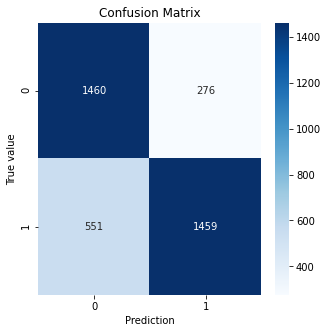

In [124]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.2** Count Vector

* Use the fitted `model_lr_cv` (Bag-of-words) to predict X_test



In [125]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

* Print the model accuracy by comparing predictions and real sentiments

In [126]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

LR Model Accuracy: 88.55%


* Plot the confusion matrix by using the `plot_confusion` helper function

<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

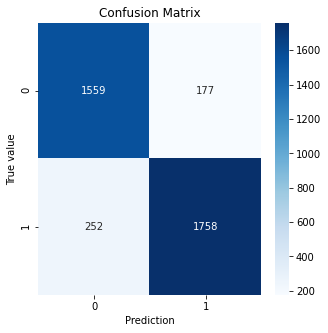

In [127]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.3** TF-IDF

* Use the fitted `model_lr_tf` (TF-IDF) to predict X_test



In [128]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

* Print the model accuracy by comparing predictions and real sentiments

In [129]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

LR Model Accuracy: 88.57%


* Plot the confusion matrix by using the `plot_confusion` helper function

<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

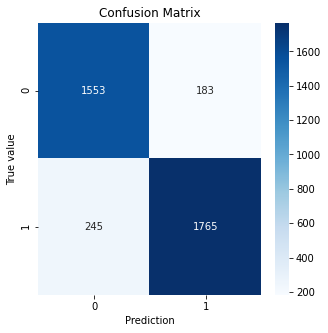

In [130]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

## **4.4** Mini-Pipeline


* Final tweet used to check if the model works as well as expected
* **Note:** don't hesitate to input your own tweet!

In [131]:
your_tweet = """RT @AIOutsider: tune in for more amazing NLP content! 
And don't forget to visit https://AIOutsider.com ..."""

* Create a `predict_tweet` function used to pre-process, transform and predict tweet sentiment

In [132]:
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

* ... Predict your tweet sentiment by using the `predict_tweet` function!

In [133]:
predict_tweet(your_tweet)

'Prediction is positive sentiment'

# Thank you!